# Deep learning - Jugendforum Informatik
---

This is just to make the notebook look prettier. It is modifying the HTML code of the notebook so the caption of the figures is centered. 

In [5]:
from IPython.core.display import HTML
HTML("""
<style>
.center {
  text-align: center;
}
</style>
""")

## Introduction
---

Deep learning is based on the following intuition: complex objects are composed of simpler ones. So combining simple objects in the right way we should be able to represent something more complex, now if we combine more complex objects we can represent even more complex ones and so on. 

This raises the question of can we represent this intuition in a computer. The answer are **artificial neural networks** (NN for short).


## This tutorial

In this tutorial we will explore some basic deep learning. As before this is an interractive tutorial so after we introduce a concept we will let you experiement with some tasks and learning by doing. 

We will use two datasets the one we use for the examples is called MNIST (https://en.wikipedia.org/wiki/MNIST_database) and it is composed of figures like 

<img src="./images/MnistExamples.png" alt="MNIST" width="500"/>
<div class="center"> 
    source: <a href="https://corochann.com/mnist-dataset-introduction-1138.html"> 
        corochann.com
    </a>
    <br/><br/>
</div>
each of which is encoded with 28x28 pixels and comes with a label attached that represents which digits that image contains. 

Meanwhile the dataset you will use in the execises is a subset of the Quick, Draw! dataset created by Google (https://github.com/googlecreativelab/quickdraw-dataset) and it is composed of figures like

<img src="./images/QuickDraw.jpg" alt="QuickDraw" width="1000"/>

<div class="center"> 
    source: <a href="https://quickdraw.withgoogle.com/data"> 
        Quick, Draw!
    </a>
    <br/><br/>
</div>


but before start with this complex datasets let us introduce what a neural network is and how it works.

## Artificial Neurons
---

As the name implies artificial neural networks are vaguelly inspired by how our brain works. The brain is composed by a bunch of neurons that comunitate among themselves. 

<img src="./images/neuron.svg" alt="How a neuron works" width="700"/>

<div class="center"> 
    source: <a href="https://en.wikipedia.org/wiki/Neuron"> 
        Wikipedia
    </a>
    <br/><br/>
</div>


this is modeled in an artificial neuron like this:

  1. We take an **input** $x_i$ and we multiply it by a weight $w_i$.
  *  We add all the input a **weight** together $\sum_i x_iw_i$
  *  We add a fixed value $b$ called **bias**
  *  We use an **activation function** that determines what the final output will be
  
In a nice diagram we will have

<img src="./images/ArtificialNeuron.svg" alt="Artificial neuron" width="700"/>

this can be a bit overwelming but do not worry, one more concept and we will have an example to play with

### Artificial Neural Netwoks
---

Artificial neural netwoks are just a series of artificial neurons one organised in a network

<img src="./images/ANN.svg" alt="Artificial neural network" width="300"/>

<div class="center"> 
    source: <a href="https://en.wikipedia.org/wiki/Artificial_neural_network"> 
        Wikipedia
    </a>
    <br/><br/>
</div>

the collection of all the neurons at the same depth (the different colors in the pictures) is called a **layer**. The first layer is called **input layer**, the last **output layer** and everything in between **hidden layer**.

#### Exercise: The xor problem
---

Enough talking let us try to make everything we just said concrete. We want to create a network that can solve the xor problem. Xor stays for exclusive or and it works like this

|  a/b | 0 | 1 |
|------|---|---|
| 0    | 0 | 1 |
| 1    | 1 | 0 |

now, take a piece of paper and try to fill in the following diagram so that you can get the table above

<img src="./images/xor.png" alt="xor" width="500"/>


### Activation functions
---

The activation function is the magic that really make the neural network work. A neural network without activation function it is too simple but with activation function it can reppresent any possible function between our inputs and our outputs.

There are a lot of activation possible function

<img src="./images/Activations.png" alt="Activations" width="500"/>

<div class="center"> 
    source: <a href="https://en.wikipedia.org/wiki/Activation_function"> 
        Wikipedia
    </a>
    <br/><br/>
</div>

but we care only about the **ReLU** which is defined as
$$
f(x) = \begin{cases}
0 &\text{ if } x \leq 0\\
x &\text{ otherwise}
\end{cases}
$$

<img src="./images/ReLU.svg" alt="ReLU" width="500"/>


### Traning
---

As with any machine learning algorthm we need to tune and adjust some internal parameters so that the algormithm makes better predictions. In the case of neural networks those parameters are the weights in the artificial neurons. 

The intuition is that the weight $w_i$ tells how much the input $x_i$ will affect the output $y$. So if we tune all the $w_i$ in such a way that the prediction $\hat{y}$ matches the real $y$ as often as possible we have learned a good relationship that transforms $x$ to $y$. For a wonderful visual explanation you should watch https://www.youtube.com/watch?v=aircAruvnKk

The question remains of how do we adjust the weights. This unfortunately requires more math than you know but roughtly speaking it works like this. We start with a neural network with random weights. This of course will produce a terrible prediction $\hat{y}$. We compare $y$ and $\hat{y}$ and then mathematics provides a way to know how we need to adjust all the weights in order to produce a better prediction. This is called the **gradient** and the algorithm that allows us to compute for a neural network is called **back propagation**. Once we have this new weights, we make a new prediction, compare it and adjust the weight again until we are happy with the result.

You can find more informations here https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

### Interactive 
---
All this was quite teoretical, google provides a nice webpage that allows us to make it a bit more practical http://playground.tensorflow.org/

## Pytorch
---

Let us start with implementing our own neural network. As said above we will use MNIST to present the concepts and then you will practice on the Draw!Quick! dataset.

There are many different frameworks that can be used for deeplearning. The two major ones are: PyTorch (https://pytorch.org/) and TensorFlow (https://www.tensorflow.org/). We will use PyTorch.

### Loading the data
---

As with any other machine learning system we need to import the data into our pc. PyTorch makes it easy for us. 

First let us import PyTorch and the functions that allow us to work with datasets

In [1]:
import torch
from torchvision import datasets, transforms

Then we import the MNIST dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.transforms.Normalize((0.1307,), (0.3081,))])

trainset = datasets.MNIST(root='./data', train=True,
                          download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False,
                          download=True, transform=transform)

And then we create a dataloader. A dataloader is a nice function provided by pytorch that automatically does some thigs for us. For example the follows does
 * Divides the dataset in chunks of 100 element. Every chunk is called **batch**. This is usefull when the dataset is too big to be loaded in a GPU in one go
 * If required it shuffles the dataset
 * It uses 2 parallel operations to load the data (just to speed up)

In [3]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                          shuffle=False, num_workers=2)

#### Exercise
---
Do the same with the Quick!Draw! dataset

### Defining our model
---


In [4]:
import torch.nn as nn
import torch.nn.functional as F


Now we arrive at the first important decision we need to make. The so called **topology** of the network, which is a fancy word for saying that we need to decide how many neurons and layers we want to use.

Let us first thing about which choices are mandatory. Our input will be a $28\times 28$ image, so it has $784$ pixels. That will be our input size. The output similarly is easy. We are predicting a digit so we have 10 classes: $0, \ldots, 9$.

Everything else is up to us. We will start easy. We will use a **fully connected** model, this simply means that every neuron in one layer is connected to all the neurons in the previous and following layers. And we will use one hidden layer with 100 neurons.

In [5]:
class OneHidden(nn.Module):
    def __init__(self):
        self.input_size = 28*28
        
        super(OneHidden, self).__init__()
        self.fc1 = nn.Linear(self.input_size, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = OneHidden()
net

OneHidden(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

#### Exercise
---
Create a network with 2 hidden layers, one with 100 neurons and one with 50

### Defining the loss function
---
There is another choice that we need to make in order to train a neural network. How do we want to measure the distance between our prediction and the real value. We will simply count the number of wrong predictions. This is done like this in PyTorch.

In [6]:
criterion = nn.CrossEntropyLoss()

The following code creates the object that is able to update the weights at every iteration.

In [7]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Training
---

We finally arrived to the fun part. Let us see our network improve and make better and better predictions.

First we need to specify how many **epochs** we want our training to last. As we said before almost always we divide our datasets into chuncks or batch and we feed one batch after the other to the algorithm. An epoch passed when we feed all our data to the algorithm. 

In [8]:
nb_epochs = 20

We want to keep track of how many mistakes we make for every epoch so we can make a nice plot later

In [9]:
import numpy as np
loss_epochs = np.empty(nb_epochs)

This is the main loop for our algorithm

In [10]:
def training(nb_epochs, net):
    for epoch in range(nb_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()

        average_loss = running_loss / len(trainloader)
        loss_epochs[epoch] = average_loss

        print(f'Epoch: {epoch} ===> Loss: {average_loss}')


In [11]:
training(nb_epochs, net)
print('Finished Training')

Epoch: 0 ===> Loss: 0.7553642100095749
Epoch: 1 ===> Loss: 0.34524030178785325
Epoch: 2 ===> Loss: 0.29461314968764785
Epoch: 3 ===> Loss: 0.2638413970917463
Epoch: 4 ===> Loss: 0.24019966304302215
Epoch: 5 ===> Loss: 0.22072690609842538
Epoch: 6 ===> Loss: 0.20439922851199904
Epoch: 7 ===> Loss: 0.19051838581139843
Epoch: 8 ===> Loss: 0.17850567176317175
Epoch: 9 ===> Loss: 0.1677377288788557
Epoch: 10 ===> Loss: 0.15841704634949566
Epoch: 11 ===> Loss: 0.1501916926788787
Epoch: 12 ===> Loss: 0.1427325017315646
Epoch: 13 ===> Loss: 0.1359900146101912
Epoch: 14 ===> Loss: 0.1297139455471188
Epoch: 15 ===> Loss: 0.12445436235517264
Epoch: 16 ===> Loss: 0.11921331595319012
Epoch: 17 ===> Loss: 0.11454573535049956
Epoch: 18 ===> Loss: 0.11029038236786921
Epoch: 19 ===> Loss: 0.10597086585437258
Finished Training


### Plotting the loss
---

As human beings we are naturally visual creatures. For us a plot works much better than a lots of numbers.

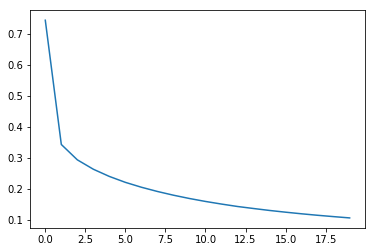

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(loss_epochs)

#### Exercise
---

Do the same with the two hidden layer network

### Accuracy
---

As with any other machine learning algorithm what we want is that a trained neural network works well on unseen data. Let us see what happens when we try to use our network to predict the digits of the test set

In [1]:
running_loss = 0
for i, data in enumerate(testloader):
    
    inputs, labels = data
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    running_loss += loss.item()
    
average_loss = running_loss / len(testloader)
print(f'Test accuracy: {average_loss}')

NameError: name 'testloader' is not defined

#### Exercise
---

Do the same with the two hidden layer network

### Plotting the predictions
---

As before an image is worth a thousand words, let us see which images out algorithm takes as input and what it predicts.

In [14]:
import numpy as np

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


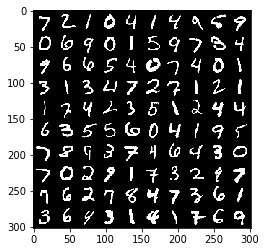

In [15]:
from torchvision.utils import make_grid

dataiter = iter(testloader)
images, labels = dataiter.next()

img = images.view((-1, 1, 28, 28))
grid = make_grid(img, nrow=10)

# print images
show(grid)

In [16]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [17]:
predicted.view(10,10)

tensor([[7, 2, 1, 0, 4, 1, 4, 9, 6, 9],
        [0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
        [9, 6, 6, 5, 4, 0, 7, 4, 0, 1],
        [3, 1, 3, 4, 7, 2, 7, 1, 2, 1],
        [1, 7, 4, 2, 3, 5, 1, 2, 4, 4],
        [6, 3, 5, 5, 6, 0, 4, 1, 9, 5],
        [7, 8, 9, 3, 7, 4, 6, 4, 3, 0],
        [7, 0, 2, 9, 1, 7, 3, 2, 9, 7],
        [7, 6, 2, 7, 8, 4, 7, 3, 6, 1],
        [3, 6, 4, 3, 1, 4, 1, 7, 6, 9]])

#### Exercise
---

Do the same for the two hidden layer network

### Convolutional Neural Networks
---

Fully connected neural networks are optimal when it comes to process images. Intuively the problem is that they are not able to capture local informations that can be repeated around an image. For example, we would like that one bunch of neurons leans to capture the concept of edge, another the concept of corner, etc. Fully connected neural networks cannot do that easily. Convolutional neural networks are designed to do that.



In [26]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
    
net = ConvNet()

In [27]:
training(nb_epochs, net)
print('Finished Training')

Epoch: 0 ===> Loss: 2.384460839430491
Epoch: 1 ===> Loss: 2.3845145511627197
Epoch: 2 ===> Loss: 2.3844826785723368


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: 

## Quick!Draw!
---
Use what you learned to make predictions on the Quick!Draw! dataset